In [10]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Set up datasets and define overlap again

In [12]:
# Load simulated data: load complete training and validation sets.
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
# Validation set similarly, but also keep information about simulation parameters
# to evaluate performance in specific simulation conditions.
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
x_train, x_validation, y_train, y_validation = train_test_split(
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files]),
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    test_size=0.2
)

In [78]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end + 1 - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [14]:
first_model = tf.keras.Sequential([
        layers.Dense(40, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
first_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    loss='mse',
    metrics=['mae', overlap_metric]
    )

In [16]:
history = first_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=1000, batch_size=8192)

Train on 72000 samples, validate on 18000 samples
Epoch 1/1000
72000/72000 [==============================] - 12s 163us/step - loss: 6121.5088 - mean_absolute_error: 57.0902 - overlap_metric: 0.0070 - val_loss: 511.0585 - val_mean_absolute_error: 17.7489 - val_overlap_metric: 0.0530
Epoch 2/1000
72000/72000 [==============================] - 0s 1us/step - loss: 577.7580 - mean_absolute_error: 19.4656 - overlap_metric: 0.0644 - val_loss: 290.9729 - val_mean_absolute_error: 13.6703 - val_overlap_metric: 0.1285
Epoch 3/1000
72000/72000 [==============================] - 0s 1us/step - loss: 193.0703 - mean_absolute_error: 11.1564 - overlap_metric: 0.1072 - val_loss: 189.6318 - val_mean_absolute_error: 11.1726 - val_overlap_metric: 0.0619
Epoch 4/1000
72000/72000 [==============================] - 0s 1us/step - loss: 155.9931 - mean_absolute_error: 10.0317 - overlap_metric: 0.0724 - val_loss: 103.6468 - val_mean_absolute_error: 7.9761 - val_overlap_metric: 0.1140
Epoch 5/1000
72000/72000 [=

Epoch 37/1000
72000/72000 [==============================] - 0s 1us/step - loss: 12.3442 - mean_absolute_error: 2.7217 - overlap_metric: 0.3645 - val_loss: 12.2262 - val_mean_absolute_error: 2.7006 - val_overlap_metric: 0.3671
Epoch 38/1000
72000/72000 [==============================] - 0s 1us/step - loss: 12.1243 - mean_absolute_error: 2.6970 - overlap_metric: 0.3664 - val_loss: 12.0120 - val_mean_absolute_error: 2.6771 - val_overlap_metric: 0.3710
Epoch 39/1000
72000/72000 [==============================] - 0s 1us/step - loss: 11.9182 - mean_absolute_error: 2.6741 - overlap_metric: 0.3708 - val_loss: 11.8074 - val_mean_absolute_error: 2.6535 - val_overlap_metric: 0.3720
Epoch 40/1000
72000/72000 [==============================] - 0s 1us/step - loss: 11.7228 - mean_absolute_error: 2.6513 - overlap_metric: 0.3727 - val_loss: 11.6175 - val_mean_absolute_error: 2.6324 - val_overlap_metric: 0.3776
Epoch 41/1000
72000/72000 [==============================] - 0s 1us/step - loss: 11.5384 - m

72000/72000 [==============================] - 0s 1us/step - loss: 8.2230 - mean_absolute_error: 2.2086 - overlap_metric: 0.4381 - val_loss: 8.1566 - val_mean_absolute_error: 2.1960 - val_overlap_metric: 0.4419
Epoch 74/1000
72000/72000 [==============================] - 0s 1us/step - loss: 8.1547 - mean_absolute_error: 2.1989 - overlap_metric: 0.4390 - val_loss: 8.0857 - val_mean_absolute_error: 2.1859 - val_overlap_metric: 0.4423
Epoch 75/1000
72000/72000 [==============================] - 0s 1us/step - loss: 8.0852 - mean_absolute_error: 2.1889 - overlap_metric: 0.4420 - val_loss: 8.0175 - val_mean_absolute_error: 2.1764 - val_overlap_metric: 0.4417
Epoch 76/1000
72000/72000 [==============================] - 0s 1us/step - loss: 8.0160 - mean_absolute_error: 2.1791 - overlap_metric: 0.4428 - val_loss: 7.9459 - val_mean_absolute_error: 2.1663 - val_overlap_metric: 0.4450
Epoch 77/1000
72000/72000 [==============================] - 0s 1us/step - loss: 7.9466 - mean_absolute_error: 2.1

72000/72000 [==============================] - 0s 1us/step - loss: 6.2502 - mean_absolute_error: 1.9149 - overlap_metric: 0.4913 - val_loss: 6.1802 - val_mean_absolute_error: 1.9017 - val_overlap_metric: 0.4950
Epoch 110/1000
72000/72000 [==============================] - 0s 1us/step - loss: 6.2153 - mean_absolute_error: 1.9093 - overlap_metric: 0.4933 - val_loss: 6.1457 - val_mean_absolute_error: 1.8961 - val_overlap_metric: 0.4962
Epoch 111/1000
72000/72000 [==============================] - 0s 1us/step - loss: 6.1820 - mean_absolute_error: 1.9039 - overlap_metric: 0.4938 - val_loss: 6.1122 - val_mean_absolute_error: 1.8911 - val_overlap_metric: 0.4955
Epoch 112/1000
72000/72000 [==============================] - 0s 1us/step - loss: 6.1490 - mean_absolute_error: 1.8986 - overlap_metric: 0.4951 - val_loss: 6.0802 - val_mean_absolute_error: 1.8859 - val_overlap_metric: 0.4977
Epoch 113/1000
72000/72000 [==============================] - 0s 1us/step - loss: 6.1177 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 5.4267 - mean_absolute_error: 1.7786 - overlap_metric: 0.5170 - val_loss: 5.3692 - val_mean_absolute_error: 1.7684 - val_overlap_metric: 0.5186
Epoch 146/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.4122 - mean_absolute_error: 1.7755 - overlap_metric: 0.5167 - val_loss: 5.3554 - val_mean_absolute_error: 1.7662 - val_overlap_metric: 0.5184
Epoch 147/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.3982 - mean_absolute_error: 1.7735 - overlap_metric: 0.5180 - val_loss: 5.3436 - val_mean_absolute_error: 1.7644 - val_overlap_metric: 0.5182
Epoch 148/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.3839 - mean_absolute_error: 1.7708 - overlap_metric: 0.5177 - val_loss: 5.3276 - val_mean_absolute_error: 1.7614 - val_overlap_metric: 0.5195
Epoch 149/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.3698 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 5.0231 - mean_absolute_error: 1.7062 - overlap_metric: 0.5288 - val_loss: 4.9786 - val_mean_absolute_error: 1.6975 - val_overlap_metric: 0.5289
Epoch 182/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.0148 - mean_absolute_error: 1.7050 - overlap_metric: 0.5288 - val_loss: 4.9710 - val_mean_absolute_error: 1.6961 - val_overlap_metric: 0.5309
Epoch 183/1000
72000/72000 [==============================] - 0s 1us/step - loss: 5.0060 - mean_absolute_error: 1.7031 - overlap_metric: 0.5282 - val_loss: 4.9642 - val_mean_absolute_error: 1.6950 - val_overlap_metric: 0.5317
Epoch 184/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.9978 - mean_absolute_error: 1.7018 - overlap_metric: 0.5294 - val_loss: 4.9556 - val_mean_absolute_error: 1.6936 - val_overlap_metric: 0.5295
Epoch 185/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.9897 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.7728 - mean_absolute_error: 1.6615 - overlap_metric: 0.5353 - val_loss: 4.7329 - val_mean_absolute_error: 1.6516 - val_overlap_metric: 0.5366
Epoch 218/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.7695 - mean_absolute_error: 1.6607 - overlap_metric: 0.5359 - val_loss: 4.7275 - val_mean_absolute_error: 1.6500 - val_overlap_metric: 0.5370
Epoch 219/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.7612 - mean_absolute_error: 1.6592 - overlap_metric: 0.5355 - val_loss: 4.7217 - val_mean_absolute_error: 1.6494 - val_overlap_metric: 0.5376
Epoch 220/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.7545 - mean_absolute_error: 1.6579 - overlap_metric: 0.5356 - val_loss: 4.7162 - val_mean_absolute_error: 1.6483 - val_overlap_metric: 0.5393
Epoch 221/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.7492 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.5851 - mean_absolute_error: 1.6274 - overlap_metric: 0.5407 - val_loss: 4.5418 - val_mean_absolute_error: 1.6155 - val_overlap_metric: 0.5413
Epoch 254/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.5816 - mean_absolute_error: 1.6267 - overlap_metric: 0.5406 - val_loss: 4.5425 - val_mean_absolute_error: 1.6169 - val_overlap_metric: 0.5407
Epoch 255/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.5781 - mean_absolute_error: 1.6264 - overlap_metric: 0.5402 - val_loss: 4.5336 - val_mean_absolute_error: 1.6142 - val_overlap_metric: 0.5439
Epoch 256/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.5730 - mean_absolute_error: 1.6250 - overlap_metric: 0.5407 - val_loss: 4.5307 - val_mean_absolute_error: 1.6142 - val_overlap_metric: 0.5414
Epoch 257/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.5685 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.4240 - mean_absolute_error: 1.5969 - overlap_metric: 0.5449 - val_loss: 4.3773 - val_mean_absolute_error: 1.5836 - val_overlap_metric: 0.5462
Epoch 290/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.4193 - mean_absolute_error: 1.5961 - overlap_metric: 0.5448 - val_loss: 4.3706 - val_mean_absolute_error: 1.5820 - val_overlap_metric: 0.5464
Epoch 291/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.4150 - mean_absolute_error: 1.5950 - overlap_metric: 0.5455 - val_loss: 4.3707 - val_mean_absolute_error: 1.5829 - val_overlap_metric: 0.5458
Epoch 292/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.4117 - mean_absolute_error: 1.5946 - overlap_metric: 0.5454 - val_loss: 4.3696 - val_mean_absolute_error: 1.5817 - val_overlap_metric: 0.5477
Epoch 293/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.4094 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.2803 - mean_absolute_error: 1.5684 - overlap_metric: 0.5496 - val_loss: 4.2327 - val_mean_absolute_error: 1.5536 - val_overlap_metric: 0.5517
Epoch 326/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.2762 - mean_absolute_error: 1.5675 - overlap_metric: 0.5493 - val_loss: 4.2293 - val_mean_absolute_error: 1.5532 - val_overlap_metric: 0.5522
Epoch 327/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.2751 - mean_absolute_error: 1.5673 - overlap_metric: 0.5495 - val_loss: 4.2232 - val_mean_absolute_error: 1.5517 - val_overlap_metric: 0.5522
Epoch 328/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.2722 - mean_absolute_error: 1.5668 - overlap_metric: 0.5501 - val_loss: 4.2221 - val_mean_absolute_error: 1.5512 - val_overlap_metric: 0.5529
Epoch 329/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.2675 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.1567 - mean_absolute_error: 1.5432 - overlap_metric: 0.5537 - val_loss: 4.1256 - val_mean_absolute_error: 1.5337 - val_overlap_metric: 0.5523
Epoch 362/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.1558 - mean_absolute_error: 1.5434 - overlap_metric: 0.5526 - val_loss: 4.1079 - val_mean_absolute_error: 1.5286 - val_overlap_metric: 0.5534
Epoch 363/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.1456 - mean_absolute_error: 1.5410 - overlap_metric: 0.5528 - val_loss: 4.1076 - val_mean_absolute_error: 1.5286 - val_overlap_metric: 0.5559
Epoch 364/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.1405 - mean_absolute_error: 1.5398 - overlap_metric: 0.5538 - val_loss: 4.0927 - val_mean_absolute_error: 1.5245 - val_overlap_metric: 0.5557
Epoch 365/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.1359 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 4.0324 - mean_absolute_error: 1.5173 - overlap_metric: 0.5561 - val_loss: 3.9795 - val_mean_absolute_error: 1.4998 - val_overlap_metric: 0.5590
Epoch 398/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.0313 - mean_absolute_error: 1.5172 - overlap_metric: 0.5570 - val_loss: 3.9937 - val_mean_absolute_error: 1.5027 - val_overlap_metric: 0.5600
Epoch 399/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.0257 - mean_absolute_error: 1.5160 - overlap_metric: 0.5563 - val_loss: 3.9725 - val_mean_absolute_error: 1.4981 - val_overlap_metric: 0.5580
Epoch 400/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.0181 - mean_absolute_error: 1.5139 - overlap_metric: 0.5572 - val_loss: 3.9711 - val_mean_absolute_error: 1.4978 - val_overlap_metric: 0.5621
Epoch 401/1000
72000/72000 [==============================] - 0s 1us/step - loss: 4.0160 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.9071 - mean_absolute_error: 1.4902 - overlap_metric: 0.5600 - val_loss: 3.8592 - val_mean_absolute_error: 1.4734 - val_overlap_metric: 0.5639
Epoch 434/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.9066 - mean_absolute_error: 1.4900 - overlap_metric: 0.5603 - val_loss: 3.8546 - val_mean_absolute_error: 1.4720 - val_overlap_metric: 0.5660
Epoch 435/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.9001 - mean_absolute_error: 1.4884 - overlap_metric: 0.5601 - val_loss: 3.8506 - val_mean_absolute_error: 1.4724 - val_overlap_metric: 0.5610
Epoch 436/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.8973 - mean_absolute_error: 1.4880 - overlap_metric: 0.5608 - val_loss: 3.8491 - val_mean_absolute_error: 1.4708 - val_overlap_metric: 0.5649
Epoch 437/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.8982 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.7936 - mean_absolute_error: 1.4652 - overlap_metric: 0.5632 - val_loss: 3.7223 - val_mean_absolute_error: 1.4433 - val_overlap_metric: 0.5677
Epoch 470/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.7787 - mean_absolute_error: 1.4614 - overlap_metric: 0.5640 - val_loss: 3.7208 - val_mean_absolute_error: 1.4438 - val_overlap_metric: 0.5674
Epoch 471/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.7805 - mean_absolute_error: 1.4624 - overlap_metric: 0.5633 - val_loss: 3.7184 - val_mean_absolute_error: 1.4427 - val_overlap_metric: 0.5685
Epoch 472/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.7967 - mean_absolute_error: 1.4664 - overlap_metric: 0.5632 - val_loss: 3.8010 - val_mean_absolute_error: 1.4643 - val_overlap_metric: 0.5649
Epoch 473/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.8090 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.6482 - mean_absolute_error: 1.4327 - overlap_metric: 0.5672 - val_loss: 3.6059 - val_mean_absolute_error: 1.4204 - val_overlap_metric: 0.5728
Epoch 506/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.6689 - mean_absolute_error: 1.4376 - overlap_metric: 0.5664 - val_loss: 3.5857 - val_mean_absolute_error: 1.4139 - val_overlap_metric: 0.5729
Epoch 507/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.6482 - mean_absolute_error: 1.4325 - overlap_metric: 0.5675 - val_loss: 3.6001 - val_mean_absolute_error: 1.4163 - val_overlap_metric: 0.5676
Epoch 508/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.6484 - mean_absolute_error: 1.4328 - overlap_metric: 0.5676 - val_loss: 3.5829 - val_mean_absolute_error: 1.4134 - val_overlap_metric: 0.5698
Epoch 509/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.6429 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.5437 - mean_absolute_error: 1.4103 - overlap_metric: 0.5701 - val_loss: 3.5611 - val_mean_absolute_error: 1.4148 - val_overlap_metric: 0.5693
Epoch 542/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.5402 - mean_absolute_error: 1.4099 - overlap_metric: 0.5697 - val_loss: 3.5086 - val_mean_absolute_error: 1.4022 - val_overlap_metric: 0.5766
Epoch 543/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.5100 - mean_absolute_error: 1.4024 - overlap_metric: 0.5715 - val_loss: 3.4595 - val_mean_absolute_error: 1.3886 - val_overlap_metric: 0.5726
Epoch 544/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.5257 - mean_absolute_error: 1.4063 - overlap_metric: 0.5707 - val_loss: 3.5842 - val_mean_absolute_error: 1.4227 - val_overlap_metric: 0.5726
Epoch 545/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.5208 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.4398 - mean_absolute_error: 1.3899 - overlap_metric: 0.5737 - val_loss: 3.4397 - val_mean_absolute_error: 1.3916 - val_overlap_metric: 0.5778
Epoch 578/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.4419 - mean_absolute_error: 1.3901 - overlap_metric: 0.5732 - val_loss: 3.3859 - val_mean_absolute_error: 1.3799 - val_overlap_metric: 0.5782
Epoch 579/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.4388 - mean_absolute_error: 1.3894 - overlap_metric: 0.5724 - val_loss: 3.4248 - val_mean_absolute_error: 1.3905 - val_overlap_metric: 0.5781
Epoch 580/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.4095 - mean_absolute_error: 1.3832 - overlap_metric: 0.5743 - val_loss: 3.3380 - val_mean_absolute_error: 1.3660 - val_overlap_metric: 0.5805
Epoch 581/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.4073 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.2515 - mean_absolute_error: 1.3469 - overlap_metric: 0.5790 - val_loss: 3.1707 - val_mean_absolute_error: 1.3274 - val_overlap_metric: 0.5870
Epoch 614/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.2560 - mean_absolute_error: 1.3473 - overlap_metric: 0.5794 - val_loss: 3.3756 - val_mean_absolute_error: 1.3860 - val_overlap_metric: 0.5676
Epoch 615/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.3739 - mean_absolute_error: 1.3793 - overlap_metric: 0.5737 - val_loss: 3.1484 - val_mean_absolute_error: 1.3214 - val_overlap_metric: 0.5861
Epoch 616/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.4352 - mean_absolute_error: 1.3953 - overlap_metric: 0.5697 - val_loss: 3.5177 - val_mean_absolute_error: 1.4182 - val_overlap_metric: 0.5791
Epoch 617/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.3294 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.1858 - mean_absolute_error: 1.3345 - overlap_metric: 0.5808 - val_loss: 3.2476 - val_mean_absolute_error: 1.3577 - val_overlap_metric: 0.5686
Epoch 650/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.2437 - mean_absolute_error: 1.3513 - overlap_metric: 0.5776 - val_loss: 3.0599 - val_mean_absolute_error: 1.3038 - val_overlap_metric: 0.5816
Epoch 651/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.0857 - mean_absolute_error: 1.3084 - overlap_metric: 0.5846 - val_loss: 3.0622 - val_mean_absolute_error: 1.3040 - val_overlap_metric: 0.5824
Epoch 652/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.2029 - mean_absolute_error: 1.3416 - overlap_metric: 0.5790 - val_loss: 3.2477 - val_mean_absolute_error: 1.3568 - val_overlap_metric: 0.5718
Epoch 653/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.1447 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.1655 - mean_absolute_error: 1.3352 - overlap_metric: 0.5796 - val_loss: 3.1494 - val_mean_absolute_error: 1.3369 - val_overlap_metric: 0.5725
Epoch 686/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.0944 - mean_absolute_error: 1.3149 - overlap_metric: 0.5833 - val_loss: 2.8756 - val_mean_absolute_error: 1.2611 - val_overlap_metric: 0.5913
Epoch 687/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9801 - mean_absolute_error: 1.2859 - overlap_metric: 0.5886 - val_loss: 2.8414 - val_mean_absolute_error: 1.2509 - val_overlap_metric: 0.5922
Epoch 688/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9677 - mean_absolute_error: 1.2824 - overlap_metric: 0.5886 - val_loss: 2.9267 - val_mean_absolute_error: 1.2758 - val_overlap_metric: 0.5931
Epoch 689/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.0369 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.9360 - mean_absolute_error: 1.2765 - overlap_metric: 0.5901 - val_loss: 3.0158 - val_mean_absolute_error: 1.3003 - val_overlap_metric: 0.5768
Epoch 722/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9257 - mean_absolute_error: 1.2733 - overlap_metric: 0.5903 - val_loss: 2.7271 - val_mean_absolute_error: 1.2226 - val_overlap_metric: 0.5979
Epoch 723/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8542 - mean_absolute_error: 1.2533 - overlap_metric: 0.5932 - val_loss: 2.7483 - val_mean_absolute_error: 1.2310 - val_overlap_metric: 0.5979
Epoch 724/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8631 - mean_absolute_error: 1.2567 - overlap_metric: 0.5929 - val_loss: 2.7479 - val_mean_absolute_error: 1.2298 - val_overlap_metric: 0.6004
Epoch 725/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8564 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 3.2074 - mean_absolute_error: 1.3491 - overlap_metric: 0.5780 - val_loss: 2.9046 - val_mean_absolute_error: 1.2810 - val_overlap_metric: 0.5943
Epoch 758/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9449 - mean_absolute_error: 1.2795 - overlap_metric: 0.5892 - val_loss: 2.8732 - val_mean_absolute_error: 1.2736 - val_overlap_metric: 0.5930
Epoch 759/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8067 - mean_absolute_error: 1.2436 - overlap_metric: 0.5956 - val_loss: 2.6748 - val_mean_absolute_error: 1.2111 - val_overlap_metric: 0.6047
Epoch 760/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.7426 - mean_absolute_error: 1.2248 - overlap_metric: 0.5986 - val_loss: 2.6444 - val_mean_absolute_error: 1.2019 - val_overlap_metric: 0.6025
Epoch 761/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.7248 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.7186 - mean_absolute_error: 1.2211 - overlap_metric: 0.5994 - val_loss: 2.5878 - val_mean_absolute_error: 1.1931 - val_overlap_metric: 0.6059
Epoch 794/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.6647 - mean_absolute_error: 1.2077 - overlap_metric: 0.6015 - val_loss: 2.5440 - val_mean_absolute_error: 1.1783 - val_overlap_metric: 0.6080
Epoch 795/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.7020 - mean_absolute_error: 1.2176 - overlap_metric: 0.6000 - val_loss: 2.6047 - val_mean_absolute_error: 1.1975 - val_overlap_metric: 0.6066
Epoch 796/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.7325 - mean_absolute_error: 1.2274 - overlap_metric: 0.5980 - val_loss: 2.5545 - val_mean_absolute_error: 1.1821 - val_overlap_metric: 0.6089
Epoch 797/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9527 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.5638 - mean_absolute_error: 1.1803 - overlap_metric: 0.6064 - val_loss: 2.6578 - val_mean_absolute_error: 1.2121 - val_overlap_metric: 0.5899
Epoch 830/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8258 - mean_absolute_error: 1.2576 - overlap_metric: 0.5926 - val_loss: 2.4897 - val_mean_absolute_error: 1.1653 - val_overlap_metric: 0.6078
Epoch 831/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.8573 - mean_absolute_error: 1.2653 - overlap_metric: 0.5918 - val_loss: 2.9593 - val_mean_absolute_error: 1.3042 - val_overlap_metric: 0.5964
Epoch 832/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.7414 - mean_absolute_error: 1.2322 - overlap_metric: 0.5969 - val_loss: 2.5965 - val_mean_absolute_error: 1.1991 - val_overlap_metric: 0.6097
Epoch 833/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.5882 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.6877 - mean_absolute_error: 1.2192 - overlap_metric: 0.6005 - val_loss: 2.4155 - val_mean_absolute_error: 1.1444 - val_overlap_metric: 0.6121
Epoch 866/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4929 - mean_absolute_error: 1.1616 - overlap_metric: 0.6096 - val_loss: 2.4040 - val_mean_absolute_error: 1.1417 - val_overlap_metric: 0.6130
Epoch 867/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4702 - mean_absolute_error: 1.1549 - overlap_metric: 0.6110 - val_loss: 2.4032 - val_mean_absolute_error: 1.1411 - val_overlap_metric: 0.6124
Epoch 868/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.6825 - mean_absolute_error: 1.2171 - overlap_metric: 0.6002 - val_loss: 2.9207 - val_mean_absolute_error: 1.2962 - val_overlap_metric: 0.5995
Epoch 869/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.6455 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.4724 - mean_absolute_error: 1.1570 - overlap_metric: 0.6108 - val_loss: 2.4151 - val_mean_absolute_error: 1.1459 - val_overlap_metric: 0.6120
Epoch 902/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4384 - mean_absolute_error: 1.1482 - overlap_metric: 0.6128 - val_loss: 2.4123 - val_mean_absolute_error: 1.1441 - val_overlap_metric: 0.6075
Epoch 903/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4333 - mean_absolute_error: 1.1454 - overlap_metric: 0.6123 - val_loss: 2.3452 - val_mean_absolute_error: 1.1257 - val_overlap_metric: 0.6152
Epoch 904/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4223 - mean_absolute_error: 1.1429 - overlap_metric: 0.6130 - val_loss: 2.3379 - val_mean_absolute_error: 1.1232 - val_overlap_metric: 0.6158
Epoch 905/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.5335 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.3762 - mean_absolute_error: 1.1308 - overlap_metric: 0.6151 - val_loss: 2.3575 - val_mean_absolute_error: 1.1343 - val_overlap_metric: 0.6198
Epoch 938/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.3984 - mean_absolute_error: 1.1384 - overlap_metric: 0.6142 - val_loss: 2.2762 - val_mean_absolute_error: 1.1072 - val_overlap_metric: 0.6190
Epoch 939/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.3534 - mean_absolute_error: 1.1239 - overlap_metric: 0.6173 - val_loss: 2.3151 - val_mean_absolute_error: 1.1192 - val_overlap_metric: 0.6196
Epoch 940/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.4535 - mean_absolute_error: 1.1563 - overlap_metric: 0.6109 - val_loss: 2.4786 - val_mean_absolute_error: 1.1696 - val_overlap_metric: 0.6026
Epoch 941/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.5500 - mean_absolute_error:

72000/72000 [==============================] - 0s 1us/step - loss: 2.2862 - mean_absolute_error: 1.1054 - overlap_metric: 0.6202 - val_loss: 2.3652 - val_mean_absolute_error: 1.1383 - val_overlap_metric: 0.6103
Epoch 974/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.3188 - mean_absolute_error: 1.1160 - overlap_metric: 0.6182 - val_loss: 2.2036 - val_mean_absolute_error: 1.0870 - val_overlap_metric: 0.6255
Epoch 975/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.9567 - mean_absolute_error: 1.2956 - overlap_metric: 0.5896 - val_loss: 5.0629 - val_mean_absolute_error: 1.8500 - val_overlap_metric: 0.4664
Epoch 976/1000
72000/72000 [==============================] - 0s 1us/step - loss: 3.2545 - mean_absolute_error: 1.3733 - overlap_metric: 0.5742 - val_loss: 2.9110 - val_mean_absolute_error: 1.3019 - val_overlap_metric: 0.6000
Epoch 977/1000
72000/72000 [==============================] - 0s 1us/step - loss: 2.5353 - mean_absolute_error:

Check same metrics as previous notebook.

In [17]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 1.089827571551005
Overlap metric 0.6256350596215989


## Define a parameterised model

In [79]:

class BoneMarrowModel:
    LABEL_NORM_CONSTANT = 40.0
    
    def __init__(self, 
                 normalise_outputs=False,
                 normalise_inputs=False,
                 output_start_length=False,
                 use_overlap_for_loss=False,
                 hidden_layers=1,
                 hidden_layer_units=40,
                 hidden_layer_activation='relu',
                 output_layer_activation='linear'
                ):
        
        self.normalise_outputs = normalise_outputs
        
        self.model = tf.keras.Sequential(
                [layers.Dense(hidden_layer_units, activation=hidden_layer_activation) 
                 for _ in range(hidden_layers)] +
                [layers.Dense(2, activation=output_layer_activation)]
                )
        if normalise_outputs:
            def _overlap_on_normalised_labels(y_true, y_predicted):
                return overlap_metric(
                    self._transform_labels_from_zero_one(y_true),
                    self._transform_labels_from_zero_one(y_predicted)
                )
            def _mae_on_normalised_labels(y_true, y_predicted):
                return tf.keras.losses.mean_absolute_error(
                    self._transform_labels_from_zero_one(y_true),
                    self._transform_labels_from_zero_one(y_predicted)
                )
            overlap_func = _overlap_on_normalised_labels
            mae_func = _mae_on_normalised_labels
        else:
            overlap_func = overlap_metric
            mae_func = tf.keras.losses.mean_absolute_error
        
        if output_start_length:
            pass
        
        self.model.compile(
                optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
                loss=overlap_func if use_overlap_for_loss else 'mse',
                metrics=[mae_func, overlap_func]
            )
    
    def predict(self, x):
        labels = self.model.predict(x)
        if self.normalise_outputs:
            return _transform_labels_from_zero_one(labels)
        else:
            return labels
    
    def fit(self, x, y, xval, yval, **fit_args):
        if self.normalise_outputs:
            yval = self._transform_labels_to_zero_one(yval)
            y = self._transform_labels_to_zero_one(y)
        return self.model.fit(x, y, validation_data=(xval, yval), **fit_args)

    @staticmethod
    def _overlap_on_normalised_labels(y_true, y_predicted):
        return overlap_metric(y_true*LABEL_NORM_CONSTANT, y_predicted*LABEL_NORM_CONSTANT)
    
    @staticmethod
    def _transform_labels_to_zero_one(y):
        return y / LABEL_NORM_CONSTANT
    
    @staticmethod
    def _transform_labels_from_zero_one(y):
        return y * LABEL_NORM_CONSTANT


In [80]:
test_model = BoneMarrowModel(normalise_outputs=True)
history = test_model.fit(x_train, y_train, x_validation, y_validation, epochs=10)

Train on 72000 samples, validate on 18000 samples
Epoch 1/10
72000/72000 [==============================] - 10s 135us/step - loss: 11.4133 - _mae_on_normalised_labels: 43.8404 - _overlap_on_normalised_labels: 0.0699 - val_loss: 0.1301 - val__mae_on_normalised_labels: 11.5304 - val__overlap_on_normalised_labels: 0.0547
Epoch 2/10
72000/72000 [==============================] - 9s 123us/step - loss: 0.2431 - _mae_on_normalised_labels: 13.3681 - _overlap_on_normalised_labels: 0.1416 - val_loss: 0.0313 - val__mae_on_normalised_labels: 5.2763 - val__overlap_on_normalised_labels: 0.1084
Epoch 3/10
72000/72000 [==============================] - 9s 123us/step - loss: 0.0573 - _mae_on_normalised_labels: 6.8079 - _overlap_on_normalised_labels: 0.2404 - val_loss: 0.1827 - val__mae_on_normalised_labels: 15.6697 - val__overlap_on_normalised_labels: 0.0014
Epoch 4/10
72000/72000 [==============================] - 9s 119us/step - loss: 0.0172 - _mae_on_normalised_labels: 3.8092 - _overlap_on_normalise

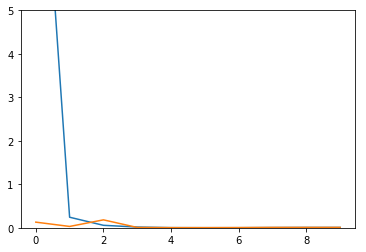

In [81]:
plt.ylim(0, 5)
plt.plot(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'])